In [62]:
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
fname="Jelgava_2017-2021_t_p_def.xls"
df=pd.read_excel(fname,parse_dates=["Datums \ Laiks"],index_col=0)
df=df.reindex(columns=["vidējais sniega segas biezums, cm","summa","dienas vidējā temperatūra, C","vidējais relatīvais mitrums"])

###############
window_size=14

##############

for i in range(1, window_size):
    df[f'summa_{i}'] = df['summa'].shift(i)
    df[f'dvt_{i}'] = df['dienas vidējā temperatūra, C'].shift(i)
    df[f'vrm_{i}'] = df['vidējais relatīvais mitrums'].shift(i)
    
df=df.dropna()

X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create a sequential model
model = Sequential()

# Add layers to the model
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=32, batch_size=32)

test_loss = model.evaluate(X_test, y_test)
y_pred = model.predict(X_test)

Epoch 1/32
46/46 [==============================] - 1s 4ms/step - loss: 31.9774 - accuracy: 0.4369
Epoch 2/32
46/46 [==============================] - 0s 4ms/step - loss: 6.8517 - accuracy: 0.4541
Epoch 3/32
46/46 [==============================] - 0s 4ms/step - loss: 4.6965 - accuracy: 0.5128
Epoch 4/32
46/46 [==============================] - 0s 4ms/step - loss: 3.8428 - accuracy: 0.5231
Epoch 5/32
46/46 [==============================] - 0s 4ms/step - loss: 3.1048 - accuracy: 0.5459
Epoch 6/32
46/46 [==============================] - 0s 4ms/step - loss: 2.8363 - accuracy: 0.5652
Epoch 7/32
46/46 [==============================] - 0s 4ms/step - loss: 2.7703 - accuracy: 0.5728
Epoch 8/32
46/46 [==============================] - 0s 3ms/step - loss: 2.7051 - accuracy: 0.5845
Epoch 9/32
46/46 [==============================] - 0s 4ms/step - loss: 2.7592 - accuracy: 0.5666
Epoch 10/32
46/46 [==============================] - 0s 4ms/step - loss: 2.4409 - accuracy: 0.5790
Epoch 11/32
46/46 

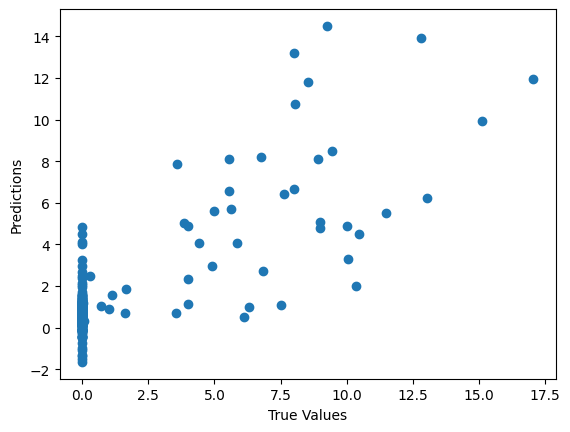

In [63]:
plt.scatter(y_test, y_pred)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.show()

57/57 [==============================] - 0s 3ms/step


C:\Users\didzis\AppData\Local\Temp\ipykernel_13352\2780385172.py:3: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  plt.plot(df[["vidējais sniega segas biezums, cm","snowcover_predicted"]]["2021"])


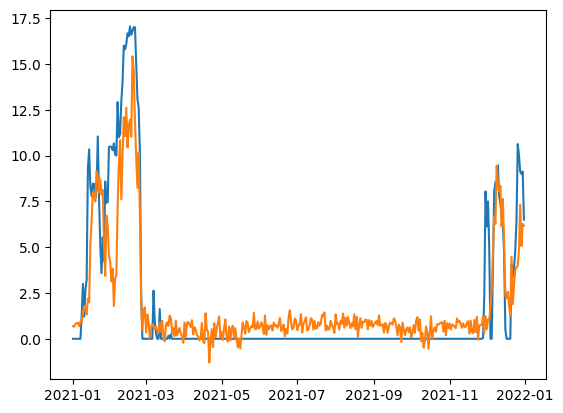

In [64]:
y_pred = model.predict(X)
df["snowcover_predicted"]=y_pred
plt.plot(df[["vidējais sniega segas biezums, cm","snowcover_predicted"]]["2021"])